# Student Loan Risk with Deep Learning

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import History

from pathlib import Path

### Viz style

In [2]:
sns.set_style('darkgrid')

### Paths

In [3]:
fig_path = os.getcwd().replace('main','vizs')
model_path = os.getcwd().replace('main','model')

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [4]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Casting 'credit_ranking'

In [5]:
loans_df['credit_ranking'] = loans_df['credit_ranking'].astype('category')

### Exploring data

In [6]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   payment_history         1599 non-null   float64 
 1   location_parameter      1599 non-null   float64 
 2   stem_degree_score       1599 non-null   float64 
 3   gpa_ranking             1599 non-null   float64 
 4   alumni_success          1599 non-null   float64 
 5   study_major_code        1599 non-null   float64 
 6   time_to_completion      1599 non-null   float64 
 7   finance_workshop_score  1599 non-null   float64 
 8   cohort_ranking          1599 non-null   float64 
 9   total_loan_score        1599 non-null   float64 
 10  financial_aid_score     1599 non-null   float64 
 11  credit_ranking          1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [7]:
loans_df.describe()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Featurs Viz

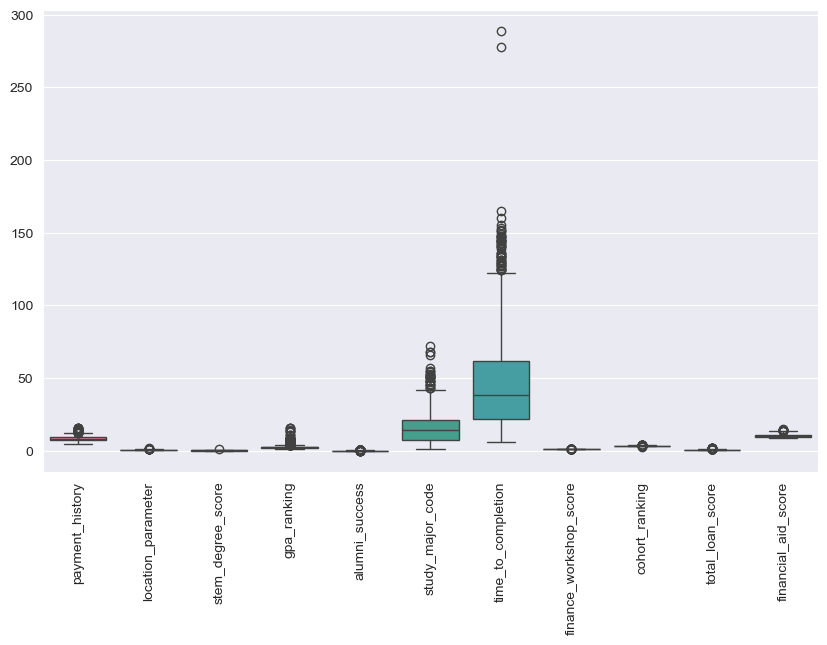

In [8]:
fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(
            loans_df,
            ax = ax
            )

plt.xticks(rotation=90)
plt.savefig(fig_path+'\\Unscaled_box_plot.png')
plt.show()

### Correlation

In [29]:
corr = loans_df.corr().round(2)

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
payment_history,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.10
location_parameter,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.32
stem_degree_score,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.16
gpa_ranking,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,-0.00
alumni_success,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.11
study_major_code,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.06
time_to_completion,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.23
finance_workshop_score,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.16
cohort_ranking,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.00
total_loan_score,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.22


### Viz

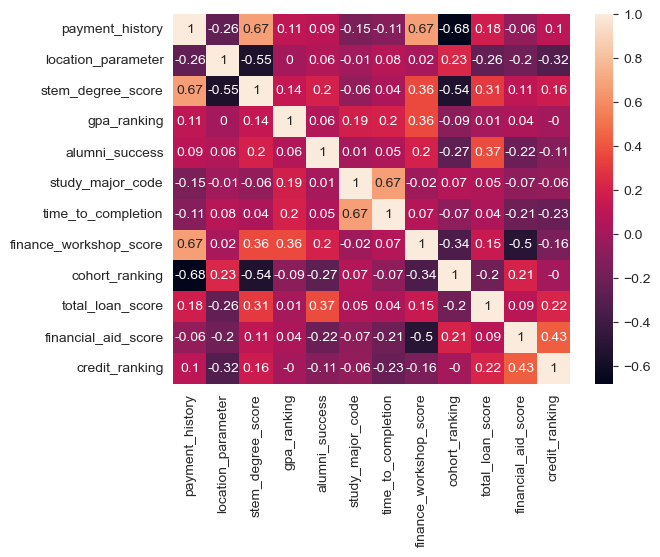

In [9]:
sns.heatmap(corr,annot = True)

plt.savefig(fig_path+'\\Heatmap.png')
plt.show()

### Target variable balance

In [10]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Viz

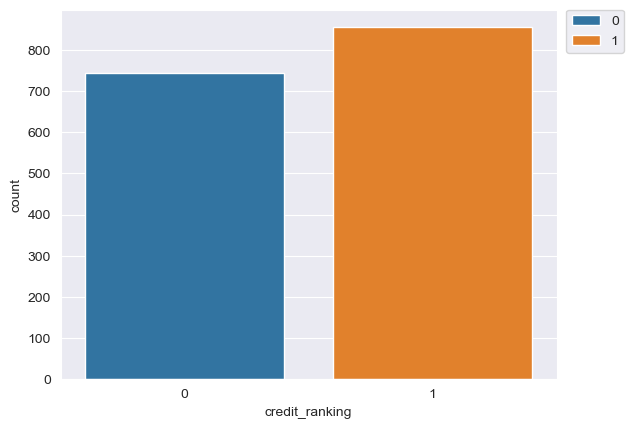

In [11]:
fig,ax = plt.subplots()
sns.countplot(
              data = loans_df,
              x = 'credit_ranking',
              hue = 'credit_ranking'
             )

plt.legend(
           bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0
           )

plt.savefig(fig_path+'\\Count_plot.png')
plt.show()

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [12]:
# Define the target set y using the credit_ranking column
y = loans_df['credit_ranking']

# Display a sample of y
y[:5]

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: category
Categories (2, int64): [0, 1]

In [13]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns = ['credit_ranking'])

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


---

### Step 3: Split the features and target sets into training and testing datasets.


In [14]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

X_train,X_test,y_train,y_test = train_test_split(
                                                 X,y,
                                                 random_state=1
                                                 )

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_train_scaled = scaler.fit_transform(X_train)

# Fit the scaler to the features training dataset
X_test_scaled = scaler.transform(X_test)

### Viz

C:\Users\Chris\AppData\Local\Temp\ipykernel_17208\3376594933.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = ax[1]).set(


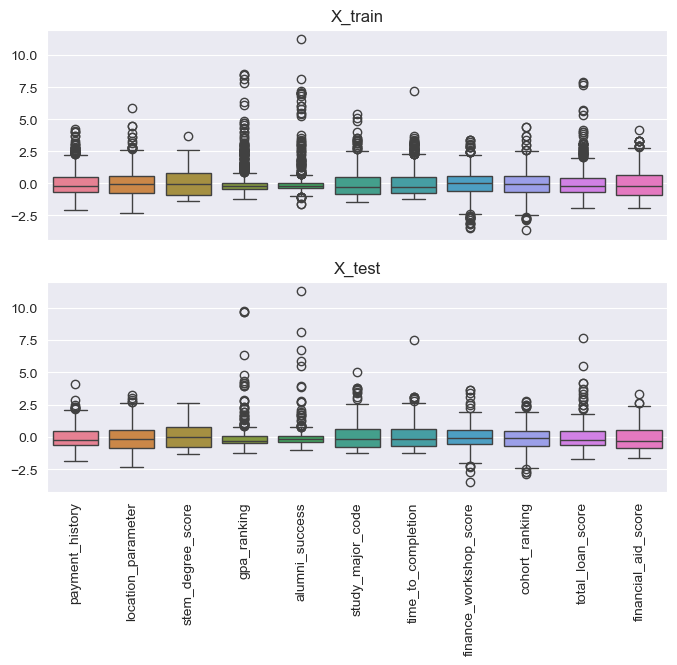

In [16]:
fig,ax = plt.subplots(
                      nrows =2, 
                      ncols =1,
                      figsize = (8,6),
                      sharex = True
                     )


sns.boxplot(X_train_scaled,
            ax = ax[0]).set_title('X_train')

sns.boxplot(X_test_scaled,
            ax = ax[1]).set(
                            xticklabels = X_test.columns,
                            title = 'X_test',
                            
                            )


plt.xticks(rotation=90)

plt.savefig(fig_path+'\\Scaled_box_plot.png')
plt.show()

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
#Input Dimensions
input_dim = X_train.columns.size
input_dim

11

In [18]:

# Sequential model
nn_model = tf.keras.models.Sequential()

#Input layer
nn_model.add(tf.keras.layers.Dense(
                                   units=input_dim, 
                                   activation="relu", 
                                   input_dim=input_dim
                                  )
            )

#First hidden layer
nn_model.add(tf.keras.layers.Dense(
                                   units=input_dim, 
                                   activation="relu"
                                  )
            )


#Second hidden layer
nn_model.add(tf.keras.layers.Dense(
                                   units=input_dim, 
                                   activation="relu"
                                  )
            )

#Output layer
nn_model.add(tf.keras.layers.Dense(
                                   units=1, 
                                   activation="sigmoid"
                                  )
            )

#Summary
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [19]:
# Compile the Sequential model
nn_model.compile(
                    loss="binary_crossentropy", 
                    optimizer="adam", 
                    metrics=["accuracy"]
                )

### Training 50 epochs

In [20]:
# Fit the model using 50 epochs and the training data

history = History()

nn_model.fit(
              X_train_scaled, 
              y_train, 
              epochs=50,
              callbacks = [history]
            )

Epoch 1/50


38/38 [==============================] - 3s 5ms/step - loss: 0.6712 - accuracy: 0.5696
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6555
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.7081
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7281
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 0.5390 - accuracy: 0.7314
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5268 - accuracy: 0.7373
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 0.5210 - accuracy: 0.7465
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7540
Epoch 9/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7523
Epoch 10/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7573
Epoch 11/50
38/38

### Epoch Loss and Accuracy

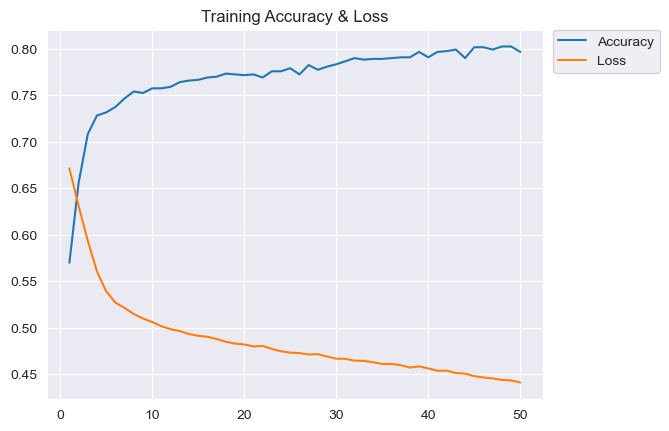

In [21]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = np.arange(1,51)

fig,ax = plt.subplots()

sns.lineplot(
             x = epochs,
             y = accuracy,
             label = 'Accuracy',
             ax = ax)

sns.lineplot(
             x = epochs,
             y = loss,
             label = 'Loss',
             ax = ax).set_title('Training Accuracy & Loss')

plt.legend(
           bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0
           )

plt.savefig(fig_path+'\\Accuracy_loss.png')
plt.show()

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [22]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
display(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - loss: 0.5344 - accuracy: 0.7475 - 214ms/epoch - 16ms/step


'Loss: 0.5344432592391968, Accuracy: 0.7475000023841858'

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [23]:
# Set the model's file path
m_path = model_path + '\\student_loans.keras'

# Export your model to a keras file
nn_model.save(m_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [24]:
# Set the model's file path
model_path = os.getcwd().replace('main','model') + '\\student_loans.keras'

# Load the model to a new object
nn_model = keras.models.load_model(model_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [25]:
# Make predictions with the test data
preds = nn_model.predict(X_test_scaled,verbose=2)

# Display a sample of the predictions
preds[:5]

13/13 - 0s - 172ms/epoch - 13ms/step


array([[0.74353147],
       [0.27490368],
       [0.78482807],
       [0.6260949 ],
       [0.9853587 ]], dtype=float32)

In [26]:
# Save the predictions to a DataFrame and round the predictions to binary results
preds_df = pd.DataFrame(preds,columns = ['Predictions'])
preds_df = preds_df.round(0)
preds_df.head()

,Predictions
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


### Step 4: Display a classification report with the y test data and predictions

In [27]:
# Print the classification report with the y test data and predictions
y_pred = preds_df['Predictions'].to_numpy() 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       188
           1       0.78      0.73      0.75       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



### Coufusion Matrix

<Figure size 640x480 with 0 Axes>

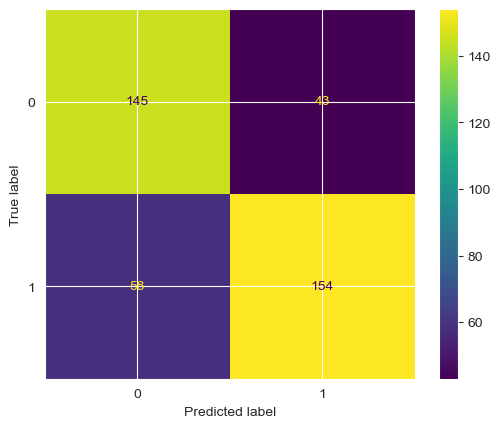

In [28]:
cm = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.savefig(fig_path+'\\Neural_nets_confusion_matrix.png')
display.plot()
plt.show()

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

